# Import the required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Loading

In [14]:
trader_data_path = "historical_data.csv" # Historical Trader Data
sentiment_data_path = "fear_greed_index.csv" # Fear/Greed Data

### Load Data

In [16]:
trader_df = pd.read_csv(trader_data_path)
sentiment_df = pd.read_csv(sentiment_data_path)

# 2. Data Preview

In [18]:
print("Trader Data Preview:")
print(trader_df.head())

print("\nSentiment Data Preview:")
print(sentiment_df.head())

Trader Data Preview:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0 

# 3. DATA CLEANING & PREPROCESSING

In [28]:
#Convert trader timestamp to datetime
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format="%d-%m-%Y %H:%M")
trader_df['date'] = trader_df['Timestamp IST'].dt.date


In [30]:
#Convert sentiment date to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

In [32]:
#merge datasets based on data
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='left')

print("Merged Data Preview:")
print(merged_df.head())

Merged Data Preview:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Or

# 4. EXPLORATORY DATA ANALYSIS (EDA)

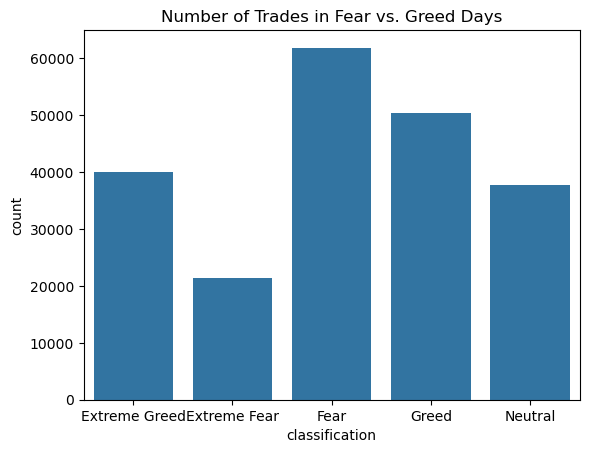

In [34]:
# Distribution of trades under Fear vs. Greed
sns.countplot(data=merged_df, x='classification')
plt.title("Number of Trades in Fear vs. Greed Days")
plt.show()


Average PnL under Fear vs. Greed:
classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64


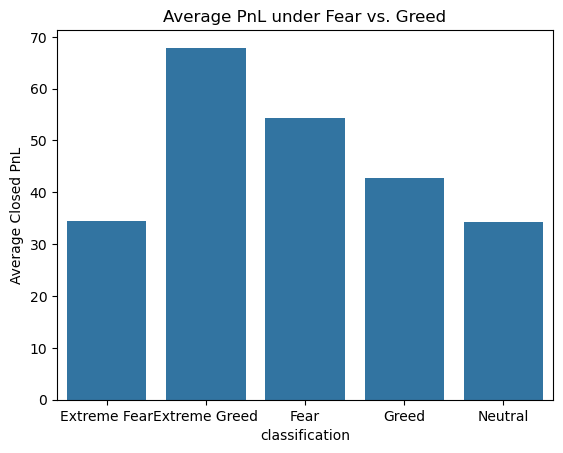

In [36]:
# Average PnL under Fear vs. Greed
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean()
print("\nAverage PnL under Fear vs. Greed:")
print(avg_pnl)

sns.barplot(x=avg_pnl.index, y=avg_pnl.values)
plt.title("Average PnL under Fear vs. Greed")
plt.ylabel("Average Closed PnL")
plt.show()

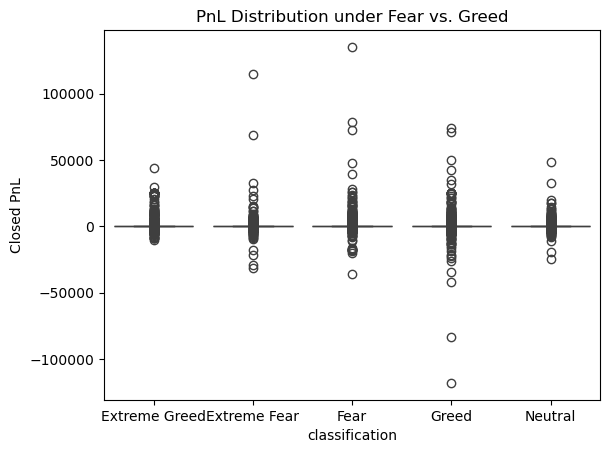

In [38]:
# Profitability distribution
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title("PnL Distribution under Fear vs. Greed")
plt.show()

In [50]:
# Leverage analysis
if 'leverage' in merged_df.columns:
    leverage_avg = merged_df.groupby('classification')['leverage'].mean()
    print("\nAverage Leverage under Fear vs. Greed:")
    print(leverage_avg)
    
    sns.barplot(x=leverage_avg.index, y=leverage_avg.values)
    plt.title("Average Leverage under Fear vs. Greed")
    plt.ylabel("Average Leverage")
    plt.show()


Average Trade Size (USD) under Fear vs. Greed:
classification
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: Size USD, dtype: float64


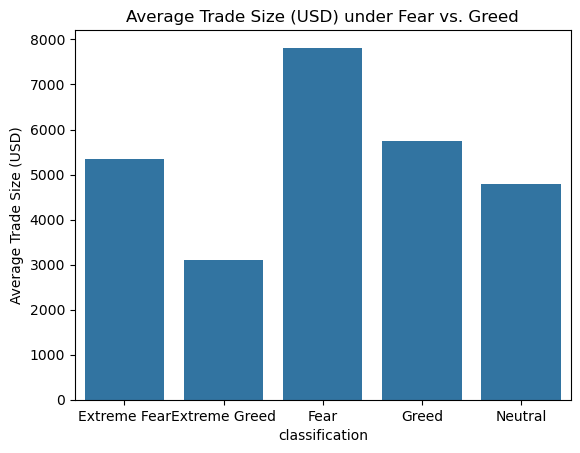

In [52]:
# Trade size analysis
size_avg = merged_df.groupby('classification')['Size USD'].mean()
print("\nAverage Trade Size (USD) under Fear vs. Greed:")
print(size_avg)

sns.barplot(x=size_avg.index, y=size_avg.values)
plt.title("Average Trade Size (USD) under Fear vs. Greed")
plt.ylabel("Average Trade Size (USD)")
plt.show()


Average PnL by Trade Side under Fear vs. Greed:
Side                  BUY        SELL
classification                       
Extreme Fear    34.114627   34.980106
Extreme Greed   10.498927  114.584643
Fear            63.927104   45.049641
Greed           25.002302   59.691091
Neutral         29.227429   39.456408


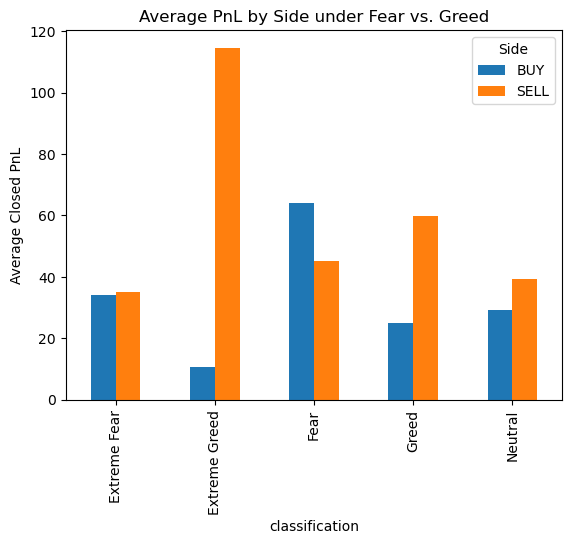

In [54]:
# Side of trade performance
side_pnl = merged_df.groupby(['classification', 'Side'])['Closed PnL'].mean().unstack()
print("\nAverage PnL by Trade Side under Fear vs. Greed:")
print(side_pnl)

side_pnl.plot(kind='bar')
plt.title("Average PnL by Side under Fear vs. Greed")
plt.ylabel("Average Closed PnL")
plt.show()

# 5. Insights 
## 1. Trader Profitability vs. Sentiment.

####     ->Average PnL is highest in Extreme Greed (~68) and strongest in Fear (~54).
####     ->Neutral and Extreme Fear days are less profitable (~34).
####     ->Moderate Greed is in between (~43).
    
####    Traders make more profits at strong sentiment extremes.
    
## 2. Trade Size vs. Sentiment.

####     ->Traders trade larger sizes in Fear (~7,816 USD average trade) than in Greed (~5,737             USD).
####     ->Extreme Greed days have less trades (~3,112 USD), which could be attributed to high            volatility or risk management.
    
####    More bets are placed in Fear periods, but smaller, managed bets in Greed periods.

## 3. Trade Side (Long vs. Short) Performance.

####     ->BUY trades prevail in Fear (PnL ~64) and Extreme Fear (~34).
####     ->SELL trades make more in Extreme Greed (PnL ~115) and Greed (~60).
    
####    Short when the market is greedy, and long when the market is fearful.

# 6. Conclusion

### 1. Sentiment plays a role: Trader performance varies extensively based on whether the market is Greed or Fear.

### 2. Exaggerate extreme conditions: Most SELL profits are generated by Extreme Greed, and Fear conditions suit BUY trades with greater position sizing.

# Strategy implication:

#### ->In Fear, preferable are long strategies with greater position sizing.

#### ->On Greed/Extreme Greed days, short trades make more money but with reduced trading size.

#### ->Neutral days produce inferior overall performance, i.e., are worse for aggressive trades.